In [1]:
from Statistics_function import *
t = Student_ttest()           #EX1-EX4
cor = correlation()            #EX5
f = Fourier()                      #EX7-EX10
ma = Moving_Average()  #EX11

### Student t-test (1 sample、2 sample、pair sample) & F-test

In [2]:
#EX1 t-test使用範例
y=[14,27,20,22,10]               #樣本
n = 5                                     #樣本數
mean = np.mean(y)               #平均值
variance = np.var(y,ddof = 1)   #樣本變異數
u0 = 21                         #母體平均值

print(t.one_sample_ttest(n, mean, variance, u0))
print(t.one_sample_ttest_list(y, u0))

(-0.8017837257372727, False)
(-0.8017837257372727, False)


In [3]:
# EX2 2 sample t-test使用範例，檢測兩筆資料其平均是否接近
n1 = 30
n2 = 25
mean1 = 25
mean2 = 18
variance1 = 25
variance2 = 9
print(t.two_sample_ttest(n1, n2, mean1, mean2, variance1, variance2))

input_list1 = [29.77, 29.77, 29.77, 29.77, 29.76, 29.75, 29.76, 29.75, 29.75, 29.7, 29.68, 29.28, 28.8]
input_list2 = [28.8, 28.82, 28.82, 28.83, 28.82, 28.82, 28.82, 28.82, 28.82, 28.83, 28.84, 28.84, 28.84]
print(t.two_sample_ttest_lsit(input_list1, input_list2))

(6.407921075822212, True)
(10.306193109811934, True)


In [4]:
# EX3 pair sample t-test使用範例，檢測兩筆資料其差異平均值是否為零(清單必須成對)
input_list1 = [29.28, 28.8, 28.28, 27.85, 27.62, 26.15, 25.79]
input_list2 = [29.53, 28.89, 28.38, 28.0, 27.66, 26.72, 25.76]

print(t.pair_sample_ttest_lsit(input_list1, input_list2))

(-2.2347623395649525, False)


In [5]:
# EX4 2 sample F-test使用範例，檢測兩筆資料其變異數是否接近
input_list1 = [29.77, 29.77, 29.77, 29.77, 29.76, 29.75, 29.76, 29.75, 29.75, 29.7, 29.68, 29.28, 28.8, 28.28, 27.85, 27.62, 26.15, 25.79, 25.7, 25.0, 24.01, 23.33, 22.82, 22.01, 21.2, 21.11, 20.58, 20.11, 18.94, 17.28]
input_list2 = [28.8, 28.82, 28.82, 28.83, 28.82, 28.82, 28.82, 28.82, 28.82, 28.83, 28.84, 28.84, 28.84, 28.84, 28.72, 26.62, 25.17]

print(t.two_sample_Ftest_lsit(input_list1, input_list2))

(15.691332721256732, True)


### 自相關 & 互相關

In [6]:
# EX5 Auto_correlation 自相關，輸入清單計算其自相關性(未對稱僅單向)
input_list1 = [10,25,40,25,10]
input_list2 = [40,20,5,20,40] 
print(cor.Auto_correlation(input_list1))

# EX6 Cross_correlation 互相關，輸入兩筆清單計算其互相關性(資料長度需相同)
# 第二個值為signr，為顯著線之值，取其正負值，若是在顯著線之外則表示具有顯著性
print(cor.Cross_correlation(input_list1, input_list2))

[0.22857, -0.11429, -0.67143, 0.05714, 1.0]
([-0.23905, 0.13944, 0.65738, -0.05976, -0.99602], 0.8783394481598402)


### 離散傅立葉轉換、反傅立葉轉換、頻譜分析

In [7]:
# EX7 離散傅立葉轉換(DFT)，能夠用來測試一筆資料訊號的強度，將時間軸轉換為頻率軸，觀察訊號的周期性
input_list = [1,0,-1,0,1]
DFT = f.DFT(input_list)
print(DFT)

# EX8 反傅立葉轉換(IFT)，將傅立葉轉換的訊號在轉換回原本的資料
IFT = f.IFT(DFT)
print(IFT)

# EX9 頻譜分析(power spectrum)，是將傅立葉轉換完的訊號轉換成頻譜進行分析，有單邊(one-side)和雙邊(two-side)兩種
one_side_ps = f.One_side_Power_Spectrum(DFT)
print(one_side_ps)

two_sid_ps = f.Two_side_Power_Spectrum(DFT)
print(two_sid_ps)

[(1+0j), (2.118033988749895+1.538841768587627j), (-0.11803398874989493-0.36327126400268084j), (-0.11803398874989476+0.36327126400267995j), (2.118033988749896-1.5388417685876261j)]
[(1.0000000000000002+0j), -8.040613248383182e-17j, (-1+7.502509096369008e-17j), (1.1102230246251565e-16+1.3792751006322465e-17j), (1-9.722955145619321e-17j)]
[0.2, 2.741640786499874, 0.05835921350012631]
[0.2, 1.370820393249937, 0.029179606750063154, 0.029179606750063015, 1.3708203932499374]


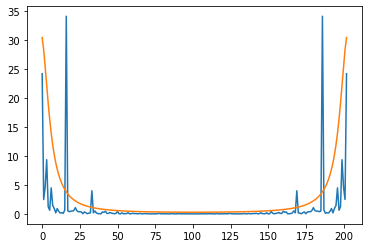

In [8]:
# EX10 頻譜分析的虛無假設-白噪音與紅噪音，白噪音為單純y=3的水平線，紅噪音則須計算下方公式為紅噪音的計算
# 註 : ssh為海表面高度資料
ssh = [10.995292399699302, 11.8599857795067, 11.4873346006184, 11.0355135730525, 12.794380191247, 14.8389425592941, 13.8448256729639, 13.132677965704902, 12.823911966668199, 13.3791222253945, 13.3960835228116, 12.877866247895698, 11.009360653330901, 9.720642511428721, 9.54796873003071, 10.4464356372644, 10.120773294854699, 11.252727556668999, 12.1170903012676, 11.8976732165152, 11.3346614138922, 10.3839883125711, 10.3085420555336, 8.71736209725195, 7.82685796761544, 7.85451017704271, 7.84272177689065, 9.44000806874541, 10.7157092210459, 11.575319309410801, 11.5662940426373, 11.3102056165339, 11.747358448595099, 11.418593865296, 11.7187546416991, 10.668711769059, 9.87289871149557, 9.543165610959429, 9.626524756407449, 11.0270170192165, 12.42015706109, 12.735369345613, 12.090563923694301, 12.134814283915201, 12.239944685277901, 11.605078847172699, 11.3473648774473, 10.5996629327566, 10.099351440235699, 9.73252564240517, 9.957315654343859, 10.9626869851653, 11.9627718269711, 13.0149381265517, 14.484976610999599, 13.928697711282402, 12.4540897706213, 13.679953526403999, 14.6244137600595, 13.2256015690243, 11.9224565100738, 10.9515320696157, 10.7110355749559, 12.409919789053, 14.2857657005634, 14.920701905615498, 15.295652709567499, 15.676839270060198, 14.993874282688699, 14.860386642216302, 14.3787876199157, 12.288726846300001, 10.990440272267099, 10.810845683350198, 11.2276645838973, 12.3083048142053, 13.0184209849211, 14.095504346090902, 14.9923894785756, 13.1638127792893, 11.1829780633796, 11.3269997154665, 11.4600704317846, 11.033286081226, 10.248343777073801, 9.76182927325385, 10.337664276585599, 10.943672138749198, 12.3241693116925, 13.4513875292852, 13.8948117962761, 13.924729391234901, 13.596965538819001, 12.5827091623288, 12.5948057732168, 11.8006433501776, 10.209188292489399, 9.46701309967152, 10.1002329130368, 11.0226310929213, 11.8231709013976, 13.3443976176995, 13.7500403945996, 13.242833933447098, 12.0272964766417, 11.6049674297076, 10.8963198052351, 11.775524070162101, 11.1234652955456, 11.114362478328399, 10.4578108392071, 11.3081787649626, 12.4308600168055, 13.8343627080933, 15.178091727914401, 14.5489291169605, 14.134660121882998, 13.9086125069551, 14.5889791474492, 13.545536418531, 11.957743195256601, 10.5578557515163, 10.1098931389441, 10.7282629879047, 11.987875311637499, 13.020835525676699, 12.7481463205934, 11.735091818879301, 10.973281043808901, 11.1816017698787, 11.9472087397001, 11.8169681912468, 10.5075999907735, 9.716327669583551, 9.982730260475169, 10.1802412940863, 9.68126679984949, 10.3910299120224, 11.8017319066216, 10.295303069499099, 9.79368535592927, 10.0627344570385, 10.4120209667817, 10.086823224359199, 8.09762429538938, 7.17863122793125, 8.05737332073471, 9.131077660279269, 9.79296647052353, 10.0930099082941, 9.46506413031083, 10.150136511482, 10.9338475818655, 12.598816705222099, 12.690341601756401, 9.952859915594118, 8.86542286189786, 7.09756320658697, 7.51256071445784, 8.72118486748331, 9.43416392373209, 11.8173933312902, 12.561807397316, 12.1389576994415, 11.2298634823808, 10.801117871404099, 10.2824261058219, 9.695525012088519, 8.85518997910821, 8.45172733141195, 8.72614004294647, 9.921251032413348, 10.844201087445299, 10.9531882374184, 10.980839641027698, 10.1790995452759, 10.2235699241806, 10.2244236127279, 9.69213537170244, 9.774406283771661, 9.63481371213199, 9.127713495036462, 9.25357482484546, 9.678835201890392, 10.171671235724302, 10.089428883969099, 11.022459648310699, 12.7870032797196, 11.6878158921613, 10.8042205835671, 10.945961697031901, 10.0234761427023, 8.56695533633839, 7.28255230404827, 7.99094221290422, 8.66253072554508, 9.86169087345642, 9.870005479350528, 10.7488829941641, 11.2179036800089, 11.5226034649086, 11.620660019056599, 11.42966164139, 11.0159764950753]
DFT_ssh = f.DFT(ssh)  #將資料做傅立葉轉換
PS,PK = f.Normalized_Power_Spectrum(ssh, DFT_ssh) #PS為雙邊頻譜分析的資料，PK為紅噪音
# print(PK)

import matplotlib.pyplot as plt
plt.plot(PS[1:]) #註記:PS雙邊頻譜分析的第一筆資料為資料加總(待確認)，通常會略過不看
plt.plot(PK[1:]) #大於紅噪音代表該時刻具有顯著性
plt.show()

### 移動平均

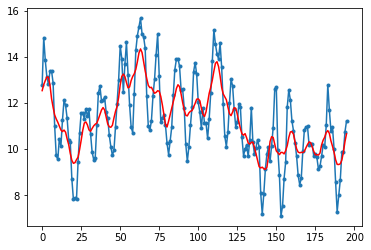

In [9]:
# EX11 移動平均(Moving Average)計算資料一定範圍(m)的滑動平均值
# 第一個公式僅單純計算移動平均之值
ssh = [10.995292399699302, 11.8599857795067, 11.4873346006184, 11.0355135730525, 12.794380191247, 14.8389425592941, 13.8448256729639, 13.132677965704902, 12.823911966668199, 13.3791222253945, 13.3960835228116, 12.877866247895698, 11.009360653330901, 9.720642511428721, 9.54796873003071, 10.4464356372644, 10.120773294854699, 11.252727556668999, 12.1170903012676, 11.8976732165152, 11.3346614138922, 10.3839883125711, 10.3085420555336, 8.71736209725195, 7.82685796761544, 7.85451017704271, 7.84272177689065, 9.44000806874541, 10.7157092210459, 11.575319309410801, 11.5662940426373, 11.3102056165339, 11.747358448595099, 11.418593865296, 11.7187546416991, 10.668711769059, 9.87289871149557, 9.543165610959429, 9.626524756407449, 11.0270170192165, 12.42015706109, 12.735369345613, 12.090563923694301, 12.134814283915201, 12.239944685277901, 11.605078847172699, 11.3473648774473, 10.5996629327566, 10.099351440235699, 9.73252564240517, 9.957315654343859, 10.9626869851653, 11.9627718269711, 13.0149381265517, 14.484976610999599, 13.928697711282402, 12.4540897706213, 13.679953526403999, 14.6244137600595, 13.2256015690243, 11.9224565100738, 10.9515320696157, 10.7110355749559, 12.409919789053, 14.2857657005634, 14.920701905615498, 15.295652709567499, 15.676839270060198, 14.993874282688699, 14.860386642216302, 14.3787876199157, 12.288726846300001, 10.990440272267099, 10.810845683350198, 11.2276645838973, 12.3083048142053, 13.0184209849211, 14.095504346090902, 14.9923894785756, 13.1638127792893, 11.1829780633796, 11.3269997154665, 11.4600704317846, 11.033286081226, 10.248343777073801, 9.76182927325385, 10.337664276585599, 10.943672138749198, 12.3241693116925, 13.4513875292852, 13.8948117962761, 13.924729391234901, 13.596965538819001, 12.5827091623288, 12.5948057732168, 11.8006433501776, 10.209188292489399, 9.46701309967152, 10.1002329130368, 11.0226310929213, 11.8231709013976, 13.3443976176995, 13.7500403945996, 13.242833933447098, 12.0272964766417, 11.6049674297076, 10.8963198052351, 11.775524070162101, 11.1234652955456, 11.114362478328399, 10.4578108392071, 11.3081787649626, 12.4308600168055, 13.8343627080933, 15.178091727914401, 14.5489291169605, 14.134660121882998, 13.9086125069551, 14.5889791474492, 13.545536418531, 11.957743195256601, 10.5578557515163, 10.1098931389441, 10.7282629879047, 11.987875311637499, 13.020835525676699, 12.7481463205934, 11.735091818879301, 10.973281043808901, 11.1816017698787, 11.9472087397001, 11.8169681912468, 10.5075999907735, 9.716327669583551, 9.982730260475169, 10.1802412940863, 9.68126679984949, 10.3910299120224, 11.8017319066216, 10.295303069499099, 9.79368535592927, 10.0627344570385, 10.4120209667817, 10.086823224359199, 8.09762429538938, 7.17863122793125, 8.05737332073471, 9.131077660279269, 9.79296647052353, 10.0930099082941, 9.46506413031083, 10.150136511482, 10.9338475818655, 12.598816705222099, 12.690341601756401, 9.952859915594118, 8.86542286189786, 7.09756320658697, 7.51256071445784, 8.72118486748331, 9.43416392373209, 11.8173933312902, 12.561807397316, 12.1389576994415, 11.2298634823808, 10.801117871404099, 10.2824261058219, 9.695525012088519, 8.85518997910821, 8.45172733141195, 8.72614004294647, 9.921251032413348, 10.844201087445299, 10.9531882374184, 10.980839641027698, 10.1790995452759, 10.2235699241806, 10.2244236127279, 9.69213537170244, 9.774406283771661, 9.63481371213199, 9.127713495036462, 9.25357482484546, 9.678835201890392, 10.171671235724302, 10.089428883969099, 11.022459648310699, 12.7870032797196, 11.6878158921613, 10.8042205835671, 10.945961697031901, 10.0234761427023, 8.56695533633839, 7.28255230404827, 7.99094221290422, 8.66253072554508, 9.86169087345642, 9.870005479350528, 10.7488829941641, 11.2179036800089, 11.5226034649086, 11.620660019056599, 11.42966164139, 11.0159764950753]
m = 9
# MA = ma.Moving_Average(ssh, m)
# plt.plot(ssh[4:200])
# plt.plot(MA)

# 第二個公式輸出兩筆清單資料，第一筆為原始資料去頭尾與移動平均對齊，第二筆為移動平均之值
import matplotlib.pyplot as plt
orgin,MA2 = ma.Moving_Average_Align(ssh, m)
plt.plot(orgin , '.-')
plt.plot(MA2 , 'r')